# Source Identification using 3 Class of image - COnvolution

In [1]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt

## Understanding Data 

In [2]:
sony=pd.read_csv("./data/sony_143_conv.csv")
sony.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,86.147,95.620,46.296,4.37480,1.24310,0.30249,87.147,96.620,47.296,0.89929,0.78737,0.75528
1,86.063,94.421,45.271,4.54730,1.21540,0.28514,87.064,95.421,46.364,0.93156,0.80113,0.78903
2,89.182,96.998,40.994,5.60200,1.18310,0.21126,90.182,97.998,41.994,0.88999,0.78921,0.82893
3,90.092,98.772,42.287,5.46890,1.20230,0.22036,91.092,99.772,43.306,0.93447,0.82847,0.84858
4,95.910,95.124,100.590,0.89057,0.98788,1.11290,96.910,96.124,101.590,0.94669,0.94299,0.92728


In [3]:
nikon=pd.read_csv("./data/nikkon_143_conv.csv")
nikon.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,79.208,105.840,42.858,6.52910,1.8116,0.30781,80.208,106.840,43.859,0.85447,0.77848,0.80745
1,80.291,106.430,42.996,6.68600,1.7812,0.29750,81.291,107.430,44.225,0.89141,0.81405,0.82285
2,73.349,96.970,35.675,7.42740,1.7487,0.23681,74.349,97.970,36.677,0.87635,0.83646,0.82346
3,78.140,105.380,36.397,8.52830,1.8231,0.21769,79.140,106.380,37.525,0.93185,0.90865,0.88682
4,40.171,43.542,51.721,0.70633,1.1850,1.68520,41.171,44.542,52.721,0.86081,0.88394,0.82186


In [4]:
canon=pd.read_csv("./data/Canon_143_conv.csv")
canon.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,102.640,112.140,55.575,4.1348,1.2005,0.29900,103.640,113.140,56.575,0.87457,0.77381,0.71383
1,101.630,110.780,53.606,4.4764,1.1947,0.28115,102.630,111.780,54.617,0.90695,0.79521,0.75612
2,102.980,109.780,51.389,4.5646,1.1368,0.24906,103.980,110.780,52.389,0.84510,0.78767,0.76815
3,101.370,110.890,51.504,4.6491,1.1973,0.25798,102.370,111.890,52.505,0.93628,0.89639,0.85926
4,66.185,67.155,66.681,1.0122,1.0357,1.02410,67.185,68.155,67.681,0.85670,0.93231,0.86471


In [5]:
nikon.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,109.036221,99.485467,72.570639,3356.559486,0.959480,0.507625,110.010699,100.476025,74.124328,0.921387,0.898338,0.863663
std,40.972564,34.672541,40.192357,75894.991398,0.483509,0.403322,40.952231,34.664793,39.710646,0.106328,0.132954,0.159995
min,20.210000,10.736000,0.882130,0.616350,0.130310,0.000367,21.346000,11.736000,3.198200,-0.461420,0.005230,-0.352930
25%,78.151000,74.032000,42.099000,1.143400,0.655420,0.186650,79.140000,75.032000,43.232000,0.904670,0.876320,0.833540
50%,107.790000,101.220000,68.024000,1.788700,0.881220,0.441120,108.790000,102.220000,69.202000,0.949200,0.940370,0.910810
75%,140.590000,125.540000,102.310000,6.414800,1.093200,0.746890,141.590000,126.540000,103.310000,0.976010,0.976490,0.952340
max,220.040000,217.320000,211.750000,1810000.000000,3.638000,3.393600,221.040000,218.320000,212.750000,0.998890,0.998640,0.997860


In [6]:
sony.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,127.441154,112.369545,83.800322,3.042400,0.826711,0.459668,128.415000,113.368755,84.843322,0.890478,0.889341,0.834397
std,43.589198,38.756441,40.929062,3.310602,0.281211,0.282342,43.582902,38.754296,40.866013,0.107436,0.114403,0.160840
min,30.526000,22.062000,10.333000,0.774680,0.158190,0.041275,31.526000,23.062000,11.472000,0.091059,-0.034645,-0.199180
25%,96.029250,85.622000,52.716750,1.235700,0.619528,0.250352,97.029250,86.622000,53.821250,0.855715,0.856520,0.801460
50%,123.635000,110.405000,79.778000,1.800850,0.811185,0.401345,124.635000,111.405000,80.992000,0.921765,0.916075,0.878230
75%,159.675000,138.187500,111.075000,3.599975,0.961790,0.645333,160.675000,139.187500,112.082500,0.962292,0.959642,0.927722
max,244.360000,236.580000,230.440000,27.239000,2.185100,2.268700,245.360000,237.570000,231.440000,0.994660,0.995520,0.991670


In [7]:
canon.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,136.630542,127.212857,98.524234,2.182164,0.932241,0.552174,137.492710,128.149285,99.481678,0.893481,0.918244,0.835117
std,48.221557,42.154986,44.261720,1.291193,0.304138,0.285861,48.083568,42.084343,44.155740,0.097588,0.067057,0.124995
min,21.361000,19.892000,12.377000,0.736530,0.272300,0.086699,22.361000,20.892000,13.378000,-0.133430,0.372330,-0.265200
25%,102.490000,97.884750,65.976750,1.197875,0.720082,0.330610,103.490000,98.884750,66.976750,0.865295,0.896250,0.809335
50%,137.160000,132.300000,93.642500,1.627500,0.915240,0.475155,138.160000,133.290000,94.642500,0.922910,0.932870,0.869140
75%,173.495000,156.610000,129.967500,2.944275,1.081225,0.708640,174.487500,157.610000,130.967500,0.950750,0.962770,0.904057
max,254.350000,253.490000,252.390000,7.708500,2.395900,1.679100,254.300000,253.490000,252.340000,0.990840,0.995060,0.983550


# Create trainig and testing data Frame

### Add Label Coloumn

In [8]:
sony.loc[:,'label'] = pd.Series(0, index=sony.index)

In [9]:
sony.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,label
0,86.147,95.620,46.296,4.37480,1.24310,0.30249,87.147,96.620,47.296,0.89929,0.78737,0.75528,0
1,86.063,94.421,45.271,4.54730,1.21540,0.28514,87.064,95.421,46.364,0.93156,0.80113,0.78903,0
2,89.182,96.998,40.994,5.60200,1.18310,0.21126,90.182,97.998,41.994,0.88999,0.78921,0.82893,0
3,90.092,98.772,42.287,5.46890,1.20230,0.22036,91.092,99.772,43.306,0.93447,0.82847,0.84858,0
4,95.910,95.124,100.590,0.89057,0.98788,1.11290,96.910,96.124,101.590,0.94669,0.94299,0.92728,0


In [10]:
nikon.loc[:,'label'] = pd.Series(1, index=nikon.index)
nikon.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,label
0,79.208,105.840,42.858,6.52910,1.8116,0.30781,80.208,106.840,43.859,0.85447,0.77848,0.80745,1
1,80.291,106.430,42.996,6.68600,1.7812,0.29750,81.291,107.430,44.225,0.89141,0.81405,0.82285,1
2,73.349,96.970,35.675,7.42740,1.7487,0.23681,74.349,97.970,36.677,0.87635,0.83646,0.82346,1
3,78.140,105.380,36.397,8.52830,1.8231,0.21769,79.140,106.380,37.525,0.93185,0.90865,0.88682,1
4,40.171,43.542,51.721,0.70633,1.1850,1.68520,41.171,44.542,52.721,0.86081,0.88394,0.82186,1


In [11]:
canon.loc[:,'label'] = pd.Series(2, index=canon.index)
canon.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,label
0,102.640,112.140,55.575,4.1348,1.2005,0.29900,103.640,113.140,56.575,0.87457,0.77381,0.71383,2
1,101.630,110.780,53.606,4.4764,1.1947,0.28115,102.630,111.780,54.617,0.90695,0.79521,0.75612,2
2,102.980,109.780,51.389,4.5646,1.1368,0.24906,103.980,110.780,52.389,0.84510,0.78767,0.76815,2
3,101.370,110.890,51.504,4.6491,1.1973,0.25798,102.370,111.890,52.505,0.93628,0.89639,0.85926,2
4,66.185,67.155,66.681,1.0122,1.0357,1.02410,67.185,68.155,67.681,0.85670,0.93231,0.86471,2


## Join All data set & Normalise

In [14]:
data=pd.concat([sony,nikon,canon])
data[570:578]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,label
570,133.640,129.180,116.140,1.25480,0.93051,0.74759,134.640,130.180,117.140,0.97966,0.98131,0.95209,0
571,93.652,90.397,75.528,1.46810,0.93038,0.64678,94.652,91.397,76.528,0.97095,0.95988,0.95235,0
0,79.208,105.840,42.858,6.52910,1.81160,0.30781,80.208,106.840,43.859,0.85447,0.77848,0.80745,1
1,80.291,106.430,42.996,6.68600,1.78120,0.29750,81.291,107.430,44.225,0.89141,0.81405,0.82285,1
2,73.349,96.970,35.675,7.42740,1.74870,0.23681,74.349,97.970,36.677,0.87635,0.83646,0.82346,1
3,78.140,105.380,36.397,8.52830,1.82310,0.21769,79.140,106.380,37.525,0.93185,0.90865,0.88682,1
4,40.171,43.542,51.721,0.70633,1.18500,1.68520,41.171,44.542,52.721,0.86081,0.88394,0.82186,1
5,40.774,45.192,53.724,0.82203,1.24220,1.75300,41.775,46.192,54.949,0.88801,0.91445,0.85522,1


In [15]:
#select all coulomn except label
data[1:3].loc[:,data.columns != 'label']

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
1,86.063,94.421,45.271,4.5473,1.2154,0.28514,87.064,95.421,46.364,0.93156,0.80113,0.78903
2,89.182,96.998,40.994,5.6020,1.1831,0.21126,90.182,97.998,41.994,0.88999,0.78921,0.82893


In [18]:
Norm_feature=normalize(data.loc[:,data.columns != 'label'], norm='l2', axis=1, copy=True)

In [19]:
Norm_feature,len(Norm_feature)

(array([[ 0.44252189,  0.49118302,  0.23781436, ...,  0.00461949,
          0.00404458,  0.00387974],
        [ 0.44603051,  0.48934672,  0.2346217 , ...,  0.00482791,
          0.00415194,  0.00408923],
        [ 0.45405752,  0.49385157,  0.20871514, ...,  0.00453126,
          0.00401815,  0.00422038],
        ..., 
        [ 0.39756564,  0.41312571,  0.40932616, ...,  0.00294818,
          0.0029821 ,  0.00292001],
        [ 0.40144004,  0.41124541,  0.40782043, ...,  0.00269559,
          0.00273017,  0.00263684],
        [ 0.3981539 ,  0.41555652,  0.40561217, ...,  0.00334596,
          0.00337556,  0.00332552]]), 1713)

# Create train and test

In [23]:
#concatenate numpy array

#training Set
train_x=np.concatenate((Norm_feature[:500], Norm_feature[640:1643]), axis=0)
train_y=np.concatenate((np.array(data[:500].loc[:,"label"]),np.array(data[640:1643].loc[:,"label"])),axis=0)

#Testing Set
test_x=np.concatenate((Norm_feature[490:650], Norm_feature[1633:]), axis=0)
test_y=np.concatenate((np.array(data[490:650].loc[:,"label"]),np.array(data[1633:].loc[:,"label"])),axis=0)


In [24]:
print "taining data :",len(train_x),len(train_y)
print "testing_data :",len(test_x),len(test_y)

taining data : 1503 1503
testing_data : 240 240


# SVM Classifier

In [25]:
# clsf = classifier
clsf=SVC(kernel='rbf',gamma=10,C=5) #SVM Classier
svm={} #store accuracy data for plotting

In [26]:
#training
clsf.fit(train_x, train_y)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Testing accuracy on training data

In [27]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clsf.predict(train_x)
svm["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',svm["trainig_set"],'%'

Accuracy Check  49.0352628077 %


### Testing accuracy on Testing data

In [28]:
prediction = clsf.predict(test_x)
svm["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',svm["test_set"],'%'

Accuracy Check  54.1666666667 %


In [29]:
svm

{'test_set': 54.166666666666664, 'trainig_set': 49.035262807717899}

# Decision Tree Classifier

In [30]:
decision={}
clf=DecisionTreeClassifier(max_depth=12,min_samples_split=4)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [31]:
#train
clf = clf.fit(train_x, train_y)

### Testing accuracy on training data

In [32]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clf.predict(train_x)
decision["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',decision["trainig_set"],'%'

Accuracy Check  87.0259481038 %


### Testing accuracy on Testing data

In [33]:
prediction = clf.predict(test_x)
decision["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',decision["test_set"],'%'

Accuracy Check  52.9166666667 %


In [34]:
decision

{'test_set': 52.916666666666664, 'trainig_set': 87.025948103792416}

# NEural-NEt 

In [35]:
from sklearn.neural_network import MLPClassifier

In [52]:
neural=dict()
clf = MLPClassifier(algorithm='l-bfgs',hidden_layer_sizes=(15,), alpha=1e-5, random_state=1)
clf

MLPClassifier(activation='relu', algorithm='l-bfgs', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [53]:
#trainig Network
clf.fit(train_x, train_y)

MLPClassifier(activation='relu', algorithm='l-bfgs', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Testing accuracy on training data

In [54]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clf.predict(train_x)
neural["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',neural["trainig_set"],'%'

Accuracy Check  49.6340652029 %


### Testing accuracy on Testing data

In [55]:
prediction = clf.predict(test_x)
neural["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',neural["test_set"],'%'

Accuracy Check  55.8333333333 %


In [56]:
neural

{'test_set': 55.833333333333336, 'trainig_set': 49.634065202927481}

## Ploting

In [60]:
import pylab as plt
plt.rcParams['figure.figsize'] = 14, 10 

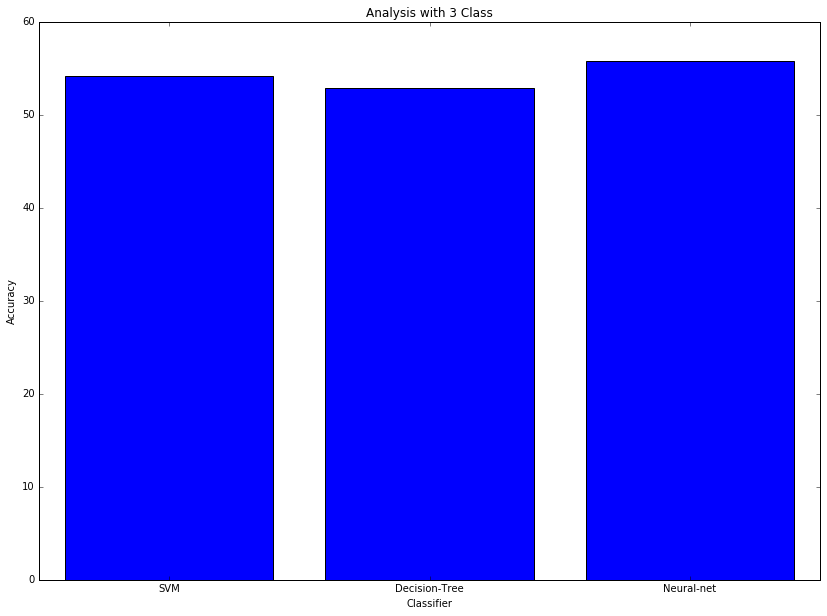

In [61]:
#%pylab inline
classifier = [1,2,3]
accuracy_test_data=[svm["test_set"],decision["test_set"],neural["test_set"]]
LABELS=["SVM","Decision-Tree","Neural-net"]

plt.bar(classifier,accuracy_test_data,align='center')
plt.xticks(classifier, LABELS) #binding label with x axis data
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Analysis with 3 Class')
plt.show()
                    

# Thank You, Bye